# **Polarization Peanuts with Fourier Analysis**

In this notebook, we generate **Voltage (V) vs Analyzer angle (rad) plots** for experiment 3.7.

Our goal is to derive the **Stokes parameters** associated with a **polarization ellipse** after calculating the **Fourier coefficients** of the Voltage (alpha) function.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['grid.alpha'] = 0.2

**We start by generating polar plots for Circularly Polarized Light**

Beta = 0 radians

Theta = pi/4 radians

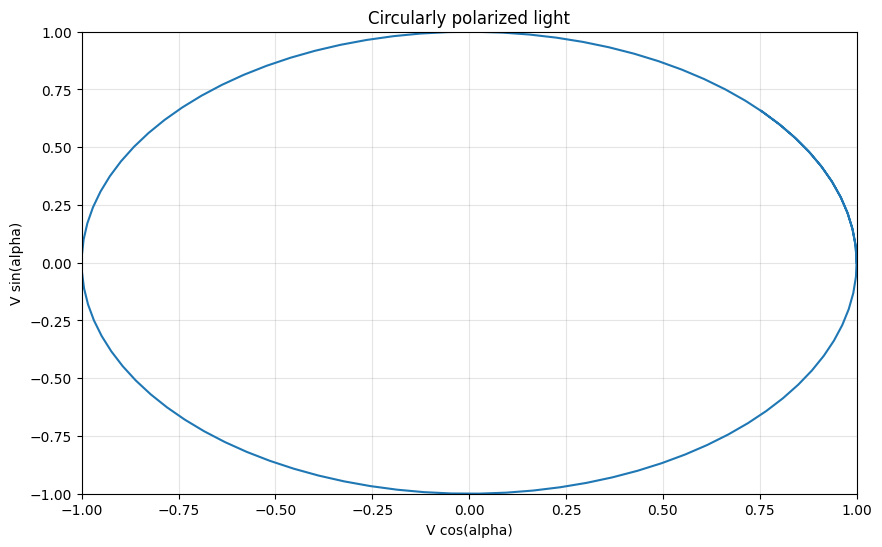

In [3]:
alpha_prime = np.linspace(0, 7, 100)

theta = np.pi/4
beta = 0

Voltage = 0.5 + 0.5 * np.cos(2 * theta) * np.cos(2 * theta - 2 * beta) * np.cos(2 * alpha_prime) \
                + 0.5 * np.sin(2 * theta) * np.cos(2 * theta - 2 * beta) * np.sin(2 * alpha_prime)

Voltage = Voltage/np.min(Voltage)

Voltage_cos_alpha_prime = Voltage * np.cos(alpha_prime)
Voltage_sin_alpha_prime = Voltage * np.sin(alpha_prime)

plt.figure(figsize=(10, 6))
plt.plot(Voltage_cos_alpha_prime, Voltage_sin_alpha_prime, '-')
plt.xlabel('V cos(alpha)')
plt.ylabel('V sin(alpha)')
plt.title('Circularly polarized light')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

**Now we plot the polarization ellipse for Horizontally Polarized Light**

Beta = 0 radians

Theta = 0 radians

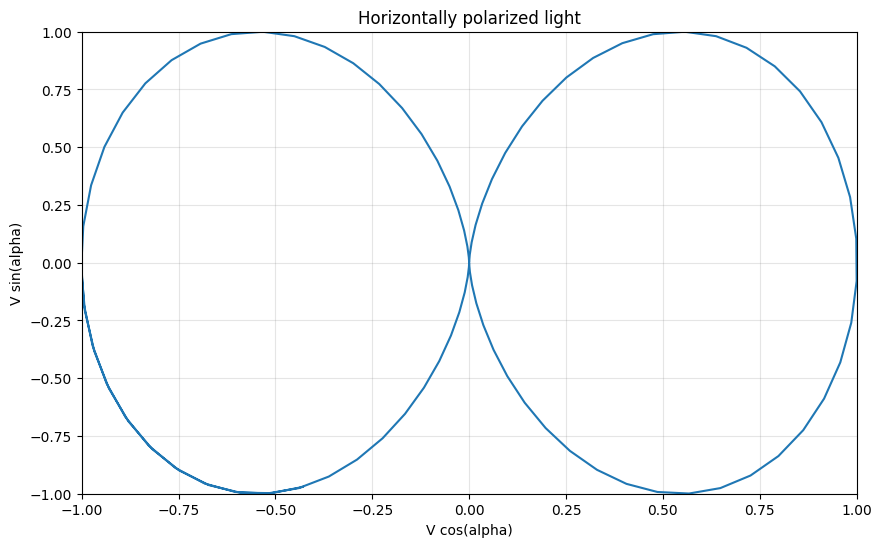

In [4]:
alpha_prime = np.linspace(0, 7, 100)

theta = 0
beta = 0

Voltage = 0.5 + 0.5 * np.cos(2 * theta) * np.cos(2 * theta - 2 * beta) * np.cos(2 * alpha_prime) \
                + 0.5 * np.sin(2 * theta) * np.cos(2 * theta - 2 * beta) * np.sin(2 * alpha_prime)

# print(Voltage)

Voltage_cos_alpha_prime = Voltage * np.cos(alpha_prime)
Voltage_cos_alpha_prime /= np.min(Voltage_cos_alpha_prime)

Voltage_sin_alpha_prime = Voltage * np.sin(alpha_prime)
Voltage_sin_alpha_prime /= np.min(Voltage_sin_alpha_prime)

plt.figure(figsize=(10, 6))
plt.plot(Voltage_cos_alpha_prime, Voltage_sin_alpha_prime, '-')
plt.xlabel('V cos(alpha)')
plt.ylabel('V sin(alpha)')
plt.title('Horizontally polarized light')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

**Now we plot the polarization ellipse for vertically polarized light**

Beta = 0 radians

Theta = pi radians (s1 = -s1)

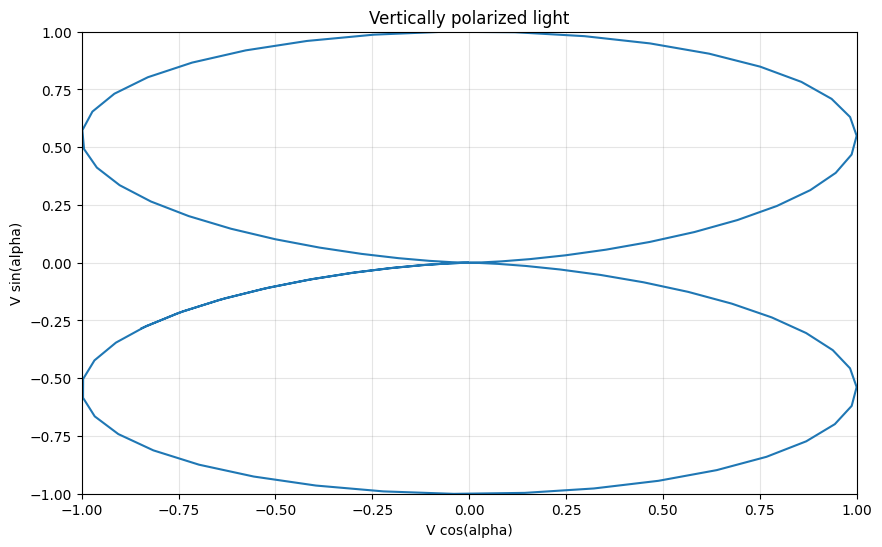

In [5]:
alpha_prime = np.linspace(0, 7, 100)

theta = np.pi
beta = 0

Voltage = 0.5 - 0.5 * np.cos(2 * theta) * np.cos(2 * theta - 2 * beta) * np.cos(2 * alpha_prime) \
                + 0.5 * np.sin(2 * theta) * np.cos(2 * theta - 2 * beta) * np.sin(2 * alpha_prime)

# print(Voltage)

Voltage_cos_alpha_prime = Voltage * np.cos(alpha_prime)
Voltage_cos_alpha_prime /= np.min(Voltage_cos_alpha_prime)

Voltage_sin_alpha_prime = Voltage * np.sin(alpha_prime)
Voltage_sin_alpha_prime /= np.min(Voltage_sin_alpha_prime)

plt.figure(figsize=(10, 6))
plt.plot(Voltage_cos_alpha_prime, Voltage_sin_alpha_prime, '-')
plt.xlabel('V cos(alpha)')
plt.ylabel('V sin(alpha)')
plt.title('Vertically polarized light')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

**Now we plot the polarization ellipse for elliptical polarization**

Beta = 0 radians

Theta = pi/8 radians

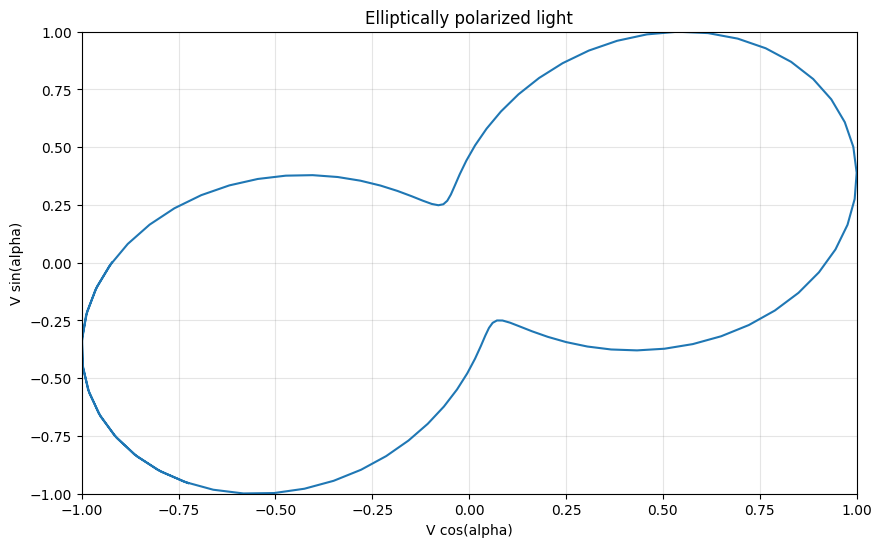

In [6]:
alpha_prime = np.linspace(0, 7, 100)

theta = np.pi/8
beta = 0

Voltage = 0.5 + 0.5 * np.cos(2 * theta) * np.cos(2 * theta - 2 * beta) * np.cos(2 * alpha_prime) \
                + 0.5 * np.sin(2 * theta) * np.cos(2 * theta - 2 * beta) * np.sin(2 * alpha_prime)

# print(Voltage)

Voltage_cos_alpha_prime = Voltage * np.cos(alpha_prime)
Voltage_cos_alpha_prime /= np.min(Voltage_cos_alpha_prime)

Voltage_sin_alpha_prime = Voltage * np.sin(alpha_prime)
Voltage_sin_alpha_prime /= np.min(Voltage_sin_alpha_prime)

plt.figure(figsize=(10, 6))
plt.plot(Voltage_cos_alpha_prime, Voltage_sin_alpha_prime, '-')
plt.xlabel('V cos(alpha)')
plt.ylabel('V sin(alpha)')
plt.title('Elliptically polarized light')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

We will now generate **Voltage (V) vs Analyzer angle** plots for an arbitrary elliptical polarization.

We will calculate the Fourier coefficients and corresponding Stokes parameters from the model and draw parallels between the shape of the polarization ellipse and the polarization state of the light.

These are the fourier coefficients corresponding to the voltage plot:
0.4584836370695204
0.3161054484277449
0.3481342176292412


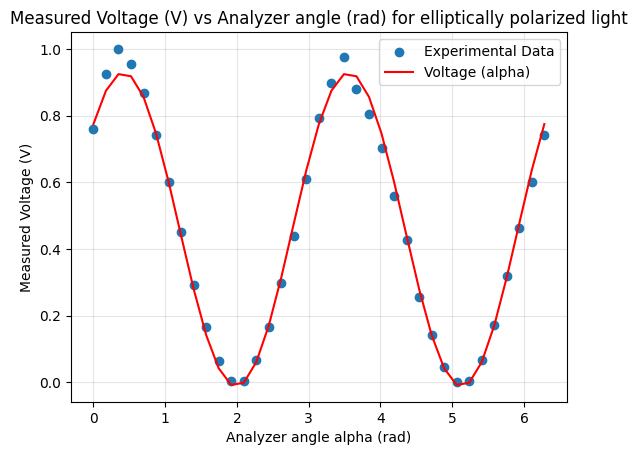

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

alpha = np.array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360])

alpha_radians = np.deg2rad(alpha)

PD_70_Right_Elliptical = np.array([1.4 , 1.69, 1.82, 1.74, 1.59, 1.37, 1.12, 0.86, 0.58, 0.36, 0.18,
       0.08, 0.08, 0.19, 0.36, 0.59, 0.84, 1.14, 1.46, 1.64, 1.78, 1.61,
       1.48, 1.3 , 1.05, 0.82, 0.52, 0.32, 0.15, 0.07, 0.08, 0.19, 0.37,
       0.63, 0.88, 1.12, 1.37])

PD_70_Right_Elliptical_normalized = np.array([0.76      , 0.92571429, 1.        , 0.95428571, 0.86857143,
       0.74285714, 0.6       , 0.45142857, 0.29142857, 0.16571429,
       0.06285714, 0.00571429, 0.00571429, 0.06857143, 0.16571429,
       0.29714286, 0.44      , 0.61142857, 0.79428571, 0.89714286,
       0.97714286, 0.88      , 0.80571429, 0.70285714, 0.56      ,
       0.42857143, 0.25714286, 0.14285714, 0.04571429, 0.        ,
       0.00571429, 0.06857143, 0.17142857, 0.32      , 0.46285714,
       0.6       , 0.74285714])

x_data = alpha_radians

y_data = PD_70_Right_Elliptical_normalized

def model(x, a, b, c):
    return a + b*np.cos(2*x) + c*np.sin(2*x)

params, params_covariance = curve_fit(model, x_data, y_data, p0=[0.5, 0.23, 0.39])

a_fit, b_fit, c_fit = params

print("These are the fourier coefficients corresponding to the voltage plot:")
print(a_fit)
print(b_fit)
print(c_fit)

y_fitted = model(x_data, a_fit, b_fit, c_fit)

plt.scatter(x_data, y_data, label='Experimental Data')
plt.plot(x_data, y_fitted, label='Voltage (alpha)', color='red')

plt.xlabel('Analyzer angle alpha (rad)')
plt.ylabel('Measured Voltage (V)')
plt.legend()
plt.title("Measured Voltage (V) vs Analyzer angle (rad) for elliptically polarized light")
plt.show()


I will now construct polar plots for some **degenerate polarization states**.

Theta = pi/4

Circular Polarization

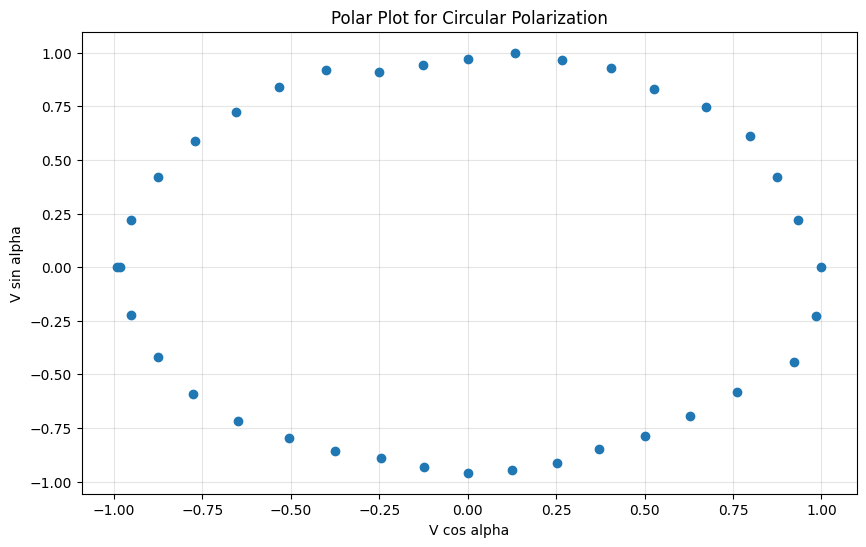

In [8]:
PD_pib4_Circular = np.array([1.16, 1.13, 1.09, 1.05, 0.99, 0.92, 0.88, 0.84, 0.84, 0.85, 0.85,
       0.86, 0.87, 0.91, 0.96, 1.03, 1.15, 1.17, 1.17, 1.11, 1.09, 1.08,
       1.03, 0.96, 0.95, 0.91, 0.9, 0.86, 0.85, 0.86, 0.94, 0.97, 1.00,
       1.04, 1.09, 1.13, 1.15])

V_cos_alpha_Circular = PD_pib4_Circular * np.cos(alpha_radians)
V_cos_alpha_Circular /= np.min(V_cos_alpha_Circular)
V_sin_alpha_Circular = PD_pib4_Circular * np.sin(alpha_radians)
V_sin_alpha_Circular /= np.min(V_sin_alpha_Circular)

plt.figure(figsize=(10, 6))
plt.plot(V_cos_alpha_Circular, V_sin_alpha_Circular, 'o')
plt.xlabel('V cos alpha')
plt.ylabel('V sin alpha')
plt.title('Polar Plot for Circular Polarization')
plt.show()

Theta = 1.22 rad

Elliptical Polarization

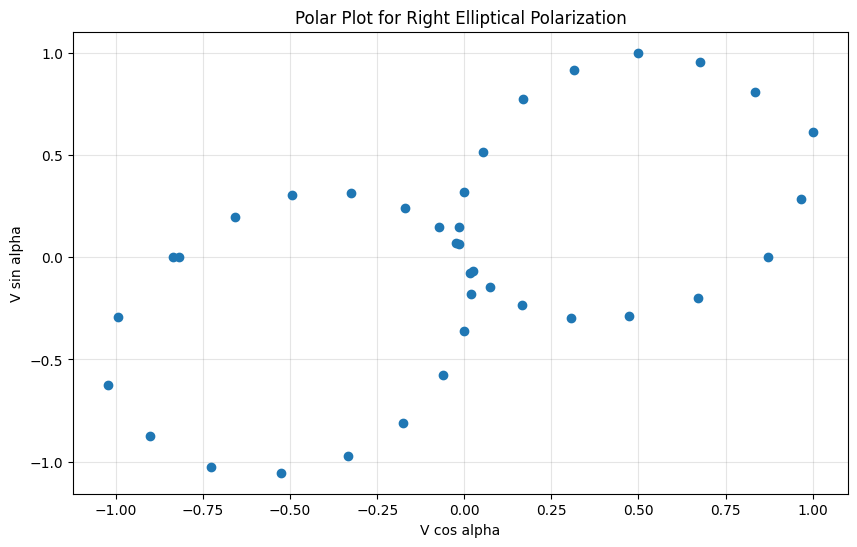

In [9]:
V_cos_alpha_RE = PD_70_Right_Elliptical * np.cos(alpha_radians)
V_cos_alpha_RE /= np.min(V_cos_alpha_RE
                         )
V_sin_alpha_RE = PD_70_Right_Elliptical * np.sin(alpha_radians)
V_sin_alpha_RE /= np.min(V_sin_alpha_RE)

plt.figure(figsize=(10, 6))
plt.plot(V_cos_alpha_RE, V_sin_alpha_RE, 'o')
plt.xlabel('V cos alpha')
plt.ylabel('V sin alpha')
plt.title('Polar Plot for Right Elliptical Polarization')
plt.show()

 **I will now identify the polar plots for horizontally polarized **light****

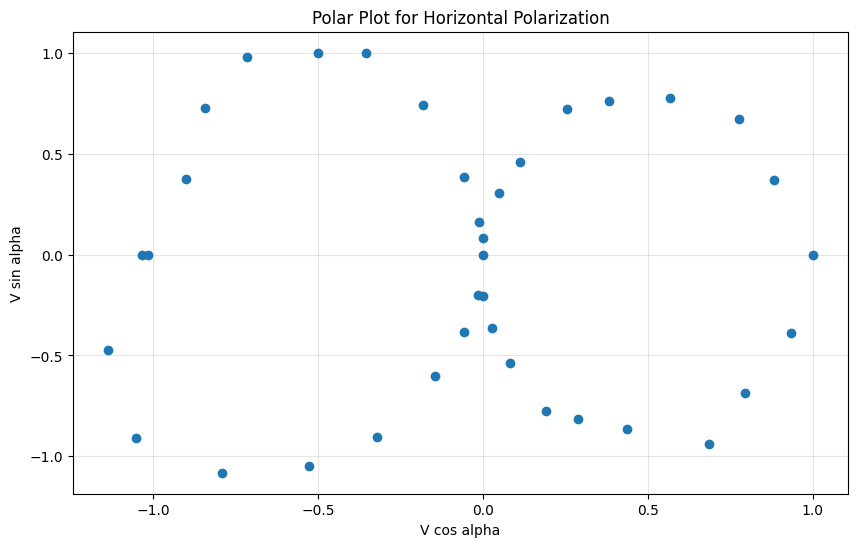

In [10]:
PD_0_Horizontal = np.array([1.14, 1.22, 1.2 , 1.08, 0.95, 0.84, 0.72, 0.65, 0.6 , 0.6 , 0.64,
       0.69, 0.77, 0.81, 0.88, 1.01, 1.04, 1.1 , 1.13, 1.07, 1.03, 0.93,
       0.84, 0.78, 0.68, 0.63, 0.55, 0.57, 0.59, 0.65, 0.76, 0.87, 0.93,
       1.03, 1.07, 1.08, 1.15])


PD_0_Horizontal_normalized = np.array([0.88059701, 1.        , 0.97014925, 0.79104478, 0.59701493,
       0.43283582, 0.25373134, 0.14925373, 0.07462687, 0.07462687,
       0.13432836, 0.20895522, 0.32835821, 0.3880597 , 0.49253731,
       0.68656716, 0.73134328, 0.82089552, 0.86567164, 0.7761194 ,
       0.71641791, 0.56716418, 0.43283582, 0.34328358, 0.19402985,
       0.11940299, 0.        , 0.02985075, 0.05970149, 0.14925373,
       0.31343284, 0.47761194, 0.56716418, 0.71641791, 0.7761194 ,
       0.79104478, 0.89552239])

V_cos_alpha_H = PD_0_Horizontal_normalized * np.cos(alpha_radians)
V_cos_alpha_H /= np.min(V_cos_alpha_H)

V_sin_alpha_H = PD_0_Horizontal_normalized * np.sin(alpha_radians)
V_sin_alpha_H /= np.min(V_sin_alpha_H)

plt.figure(figsize=(10, 6))
plt.plot(V_cos_alpha_H, V_sin_alpha_H, 'o')
plt.xlabel('V cos alpha')
plt.ylabel('V sin alpha')
plt.title('Polar Plot for Horizontal Polarization')
plt.show()

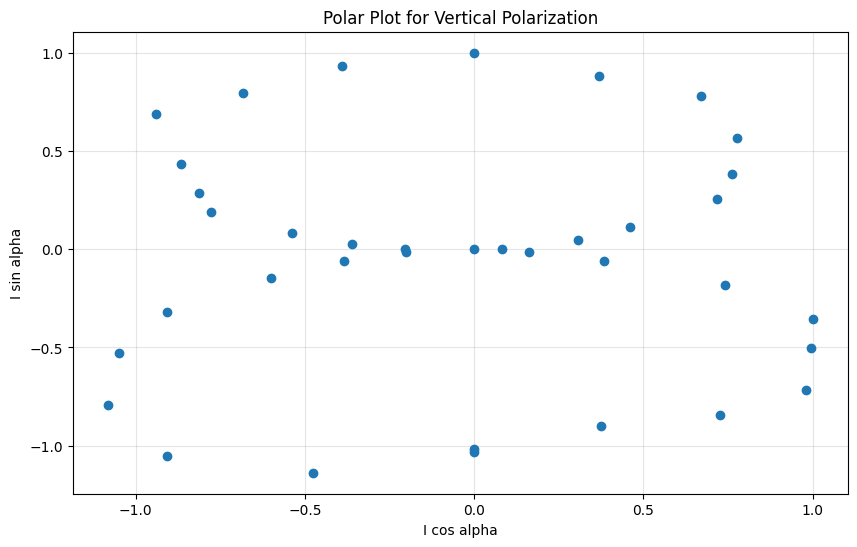

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(V_sin_alpha_H,V_cos_alpha_H, 'o')
plt.xlabel('I cos alpha')
plt.ylabel('I sin alpha')
plt.title('Polar Plot for Vertical Polarization')
plt.show()

**This concludes our journey!**

We have successfully identified, studied and generated arbitrary polarizations of light using simple lab equipment such as polarizers, quarter wave plates, half wave plates, PDs, op amps and NDFs.

We applied Jones Calculus to formulate Fourier expansion coefficients which were highly correlated with the Stokes vector construction for arbitrary angled polarizations.

Experimental data was collected for a multitude of polarization angles and the Stokes vector formulation and polarization ellipse were within ~10% error of the true polarization angle with an absolute error of ~2.7 degrees.

Future work would entail studying partial polarization of light and discovering novel ways of capturing the effect of partial polarization on the Poincare sphere projection.